## ToDos
1) Apply Color scheme only where sentiment_palette is not used
2) Save all plots to some image folder and check if they are 1) white background and 2) large enough to read in powerpoint presentation
3) Put Raw Tables into e.g. barplot where it makes sense
4) Is there a Correlation between sentiment and comment score/average post score?
5) Show relationship between Parents (posts) and children (comments) => does the sentiment of parent match average of comments?
6) Compare Word Count of posts and number of comments => do longer posts increase number of comments?
7) Find most active authors
8) Find Authors with most negative comments
9) Find Authors with highest Scored comments

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sentiment_palette = {
#     'Positive': '#00B050', # Green
#     'Negative': '#FF0000', # Red
#     'Neutral': '#7F7F7F'   # Gray
# }

sentiment_palette = {
    'Positive': '#48974D',
    'Negative': '#C3545E',
    'Neutral': '#85929E'   
}

figsize_square = (5, 5)
figsize_rect = (10, 6)
box_gap = 0.2

sns.set_theme(style="ticks", palette="pastel")

df = pd.read_csv('../data/Audi_bmw_100posts_cleaned.csv',
                      converters={'swearwords': pd.eval})
df.head()

,type,post_title,author,body,score,created_utc,parent_id,id,neg,neu,pos,compound,sentiment_type,swearwords
0,post,First Time Audi Owner,Colgray21,Traded up from a BMW 535i to this 2024 Q5 and ...,15,2026-01-05 10:31:18,NaN,1q4ia7n,0.000,1.000,0.000,0.0000,Neutral,[]
1,comment,First Time Audi Owner,ecom_ryan,Welcome to the club!,1,2026-01-05 15:16:56,t3_1q4ia7n,nxtjblw,0.000,0.477,0.523,0.5093,Positive,[]
2,post,Talk me out of it: 2016 A5 Sportback 3.0T (B8....,ThatOtherOmar,Im considering trading my 2007 BMW E92 328i fo...,18,2026-01-04 17:55:10,NaN,1q3wjtk,0.042,0.894,0.065,0.6440,Positive,[]
3,comment,Talk me out of it: 2016 A5 Sportback 3.0T (B8....,Beemeristic,"Easy, if you don't have maintenance/repair mon...",9,2026-01-04 18:59:19,t3_1q3wjtk,nxnvmrx,0.000,0.803,0.197,0.4926,Positive,[]
4,comment,Talk me out of it: 2016 A5 Sportback 3.0T (B8....,PurpleSlightlyRed,Previous owner spent more money on the fake RS...,1,2026-01-05 07:20:05,t1_nxnvmrx,nxrvusx,0.223,0.777,0.000,-0.8360,Negative,[piss]


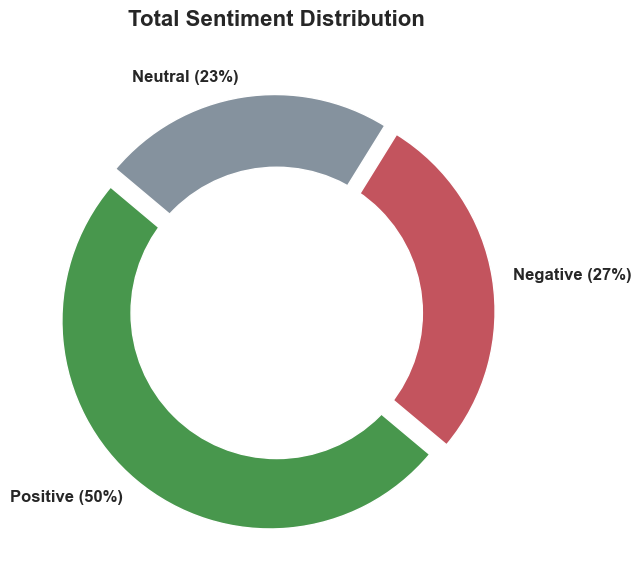

In [108]:
counts = df['sentiment_type'].value_counts()
total = counts.sum()
labels = [f'{label} ({(value/total)*100:.0f}%)' for label, value in counts.items()]

plot_colors = [sentiment_palette[label] for label in counts.index]

plt.figure(figsize=figsize_rect)

plt.pie(
    counts,
    labels=labels,
    colors=plot_colors,
    startangle=140,
    pctdistance=0.85,
    explode=[0.05] * len(counts), # small gap in-between slices
    textprops={'fontsize': 12,
               'fontweight': 'bold'}
)

plt.title("Total Sentiment Distribution", fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()

# Donut chart yay
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.savefig('../img/total_sent_dist_new_palette.png')

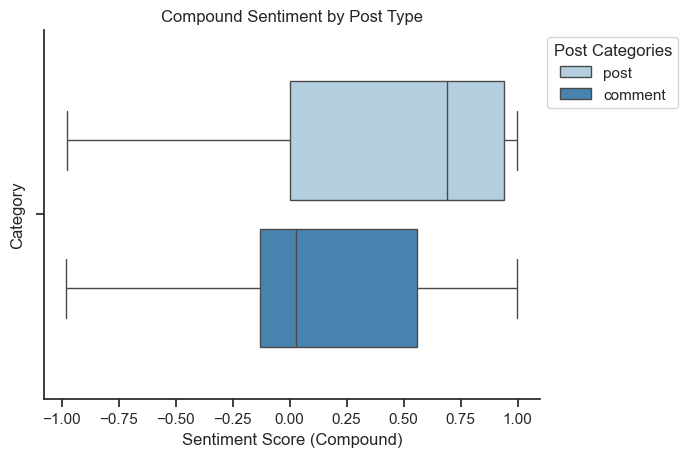

In [100]:
ax = sns.boxplot(
    data=df,
    x='compound',
    hue='type',
    gap=box_gap,
    palette="Blues"
)

sns.move_legend(
    ax,
    "upper left",
    bbox_to_anchor=(1, 1), title='Post Categories')

ax.set(
    title="Compound Sentiment by Post Type",
    xlabel="Sentiment Score (Compound)",
    ylabel="Category")

sns.despine() # Remove borders
plt.savefig('../img/box_comp_sent_by_type.png')

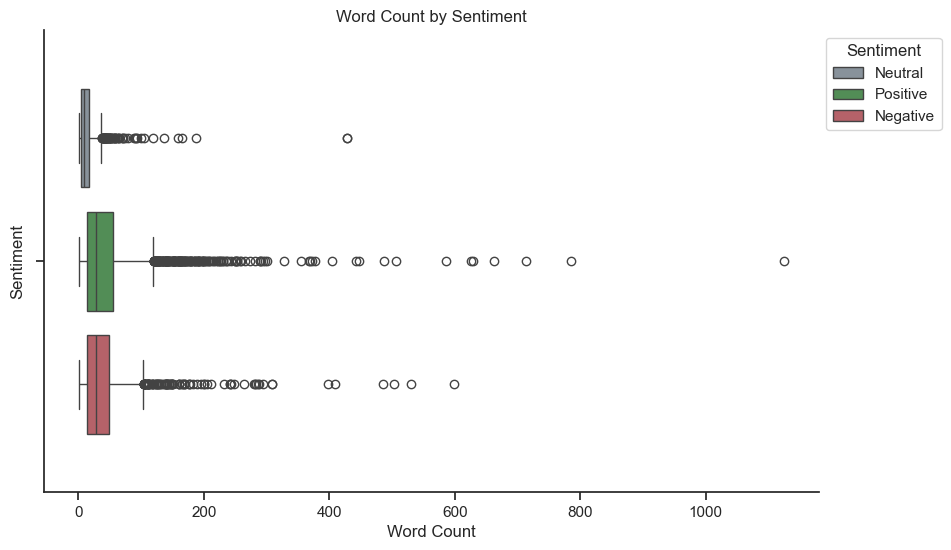

In [109]:
df['word_count'] = df['body'].str.count(' ') + 1

plt.figure(figsize=figsize_rect)
ax = sns.boxplot(
    data=df,
    x='word_count',
    hue='sentiment_type',
    gap=box_gap,
    palette=sentiment_palette
)

sns.move_legend(
    ax,
    "upper left",
    bbox_to_anchor=(1, 1),
    title='Sentiment')

ax.set(
    title="Word Count by Sentiment",
    xlabel="Word Count",
    ylabel="Sentiment")

sns.despine() # Remove borders
plt.savefig('../img/box_words_by_sent_unfiltered_new_palette.png')

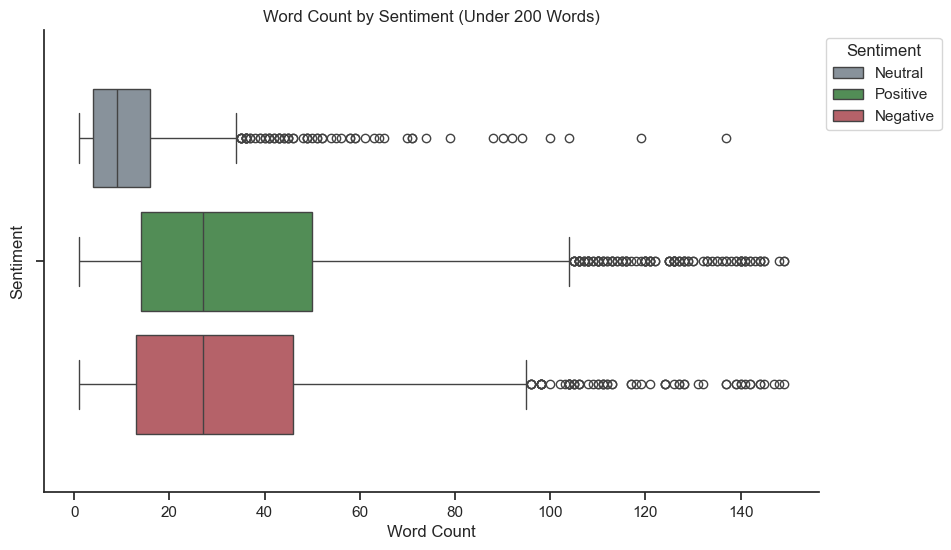

In [110]:
plt.figure(figsize=figsize_rect)
ax = sns.boxplot(
    data=df[df['word_count'] < 150],
    x='word_count',
    hue='sentiment_type',
    gap=box_gap,
    palette=sentiment_palette
)

sns.move_legend(
    ax,
    "upper left",
    bbox_to_anchor=(1, 1),
    title='Sentiment')

ax.set(
    title="Word Count by Sentiment (Under 200 Words)",
    xlabel="Word Count",
    ylabel="Sentiment")

sns.despine() # Remove borders
plt.savefig('../img/box_words_by_sent_new_palette.png')

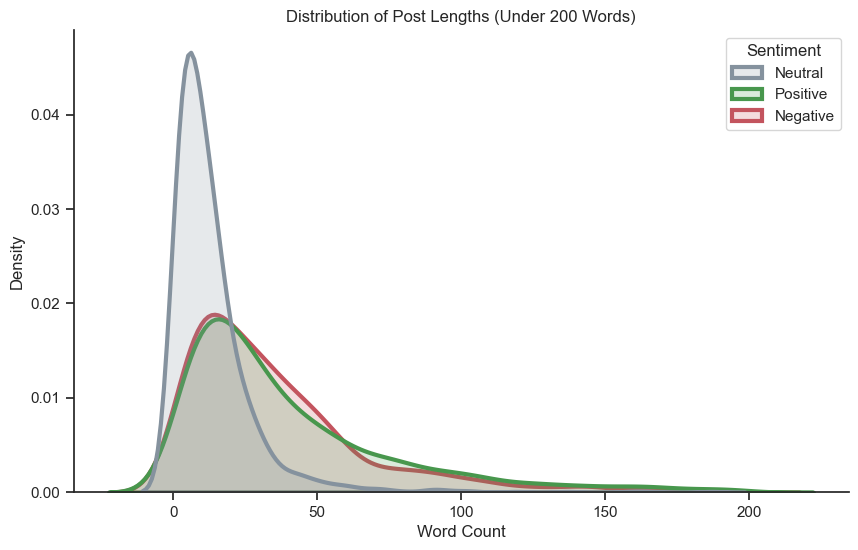

In [111]:
plt.figure(figsize=figsize_rect)
ax = sns.kdeplot(
    data=df[df['word_count'] < 200],
    x='word_count',
    hue='sentiment_type',
    fill=True,
    alpha=0.2,
    linewidth=3,          # Make the main lines bolder
    common_norm=False,
    palette=sentiment_palette
)

ax.set(
    title="Distribution of Post Lengths (Under 200 Words)",
    xlabel="Word Count",
    ylabel="Density")

sns.move_legend(ax, "upper right", title='Sentiment')

sns.despine() # Remove borders
plt.savefig('../img/dist_dense_post_len_new_palette.png')

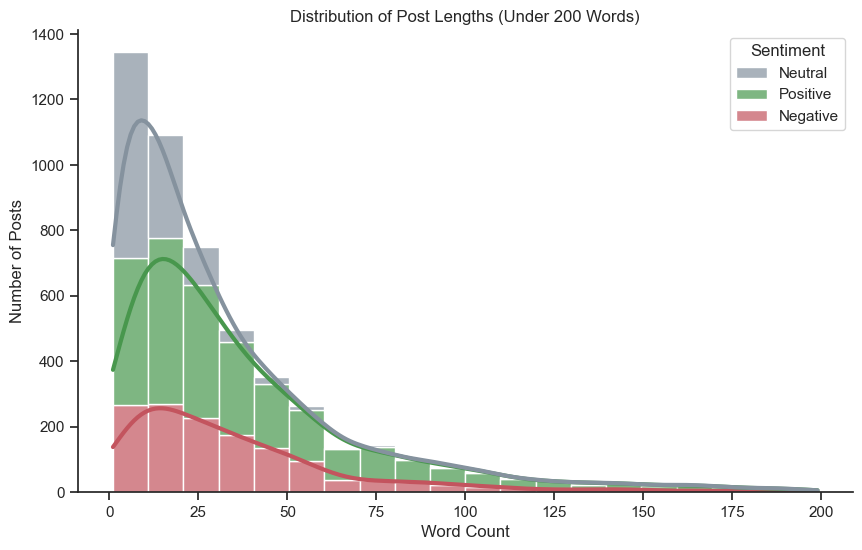

In [112]:
plt.figure(figsize=figsize_rect)
ax = sns.histplot(
    data=df[df['word_count'] < 200],
    x='word_count',
    kde=True,
    bins=20,
    hue='sentiment_type',
    multiple='stack', # or doge or fill
    alpha=0.7,
    line_kws={
        'linewidth': 3
    },
    palette=sentiment_palette
)

sns.move_legend(ax, "upper right", title='Sentiment')

ax.set(
    title='Distribution of Post Lengths (Under 200 Words)',
    xlabel='Word Count',
    ylabel='Number of Posts')

sns.despine() # Remove borders
plt.savefig('../img/dist_post_len_new_palette.png')

# Time-based analysis

In [114]:
df['created_utc_year'] = df['created_utc'].apply(lambda d: pd.Timestamp(d).year)
df['created_utc_month'] = df['created_utc'].apply(lambda d: pd.Timestamp(d).month)
df['created_utc_weekday'] = df['created_utc'].apply(lambda d: pd.Timestamp(d).dayofweek)

weekday_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

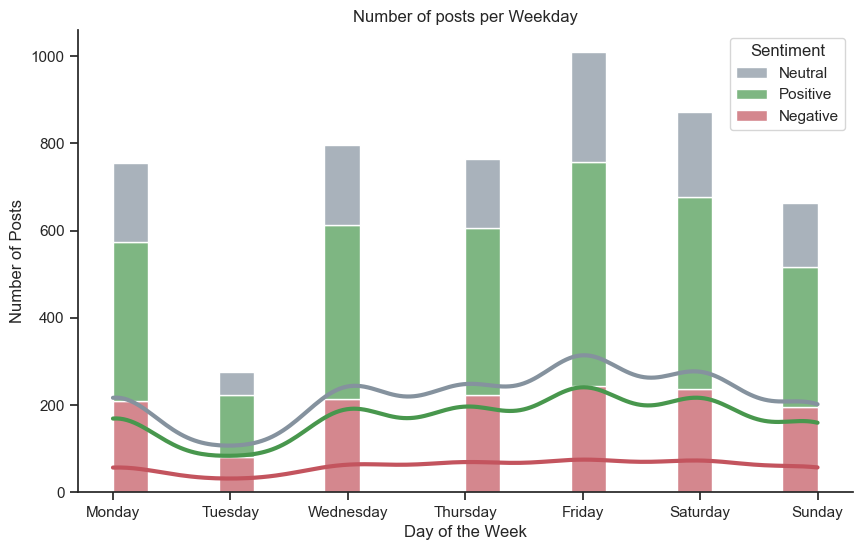

In [115]:
plt.figure(figsize=figsize_rect)
ax = sns.histplot(
    data=df,
    x='created_utc_weekday',
    kde=True,
    bins=20,
    hue='sentiment_type',
    multiple='stack', # or dodge or fill
    alpha=0.7,
    line_kws={
        'linewidth': 3
    },
    palette=sentiment_palette
)

sns.move_legend(ax, "upper right", title='Sentiment')

ax.set(
    title='Number of posts per Weekday',
    xlabel='Day of the Week',
    ylabel='Number of Posts',
    xticks=range(7),
    xticklabels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

sns.despine() # Remove borders
plt.savefig('../img/bar_posts_week_new_palette.png')

# Scores

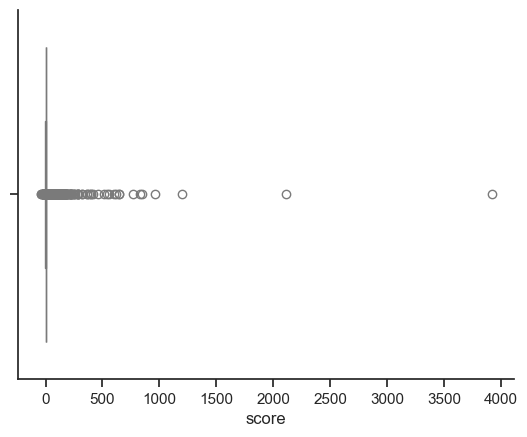

In [91]:
ax = sns.boxplot(
    df['score'],
    orient='h')

sns.despine()
plt.savefig('../img/box_scores.png')

In [20]:
q1 = df['score'].describe()['25%']
q3 = df['score'].describe()['75%']
iqr = q3 - q1
l_fence = q1 - (1.5 * iqr) # using iqr * 1.5 is usual in statistics
u_fence = q3 + (1.5 * iqr)

df_score_cleaned = df[df['score'].between(l_fence, u_fence)].sort_values('score')

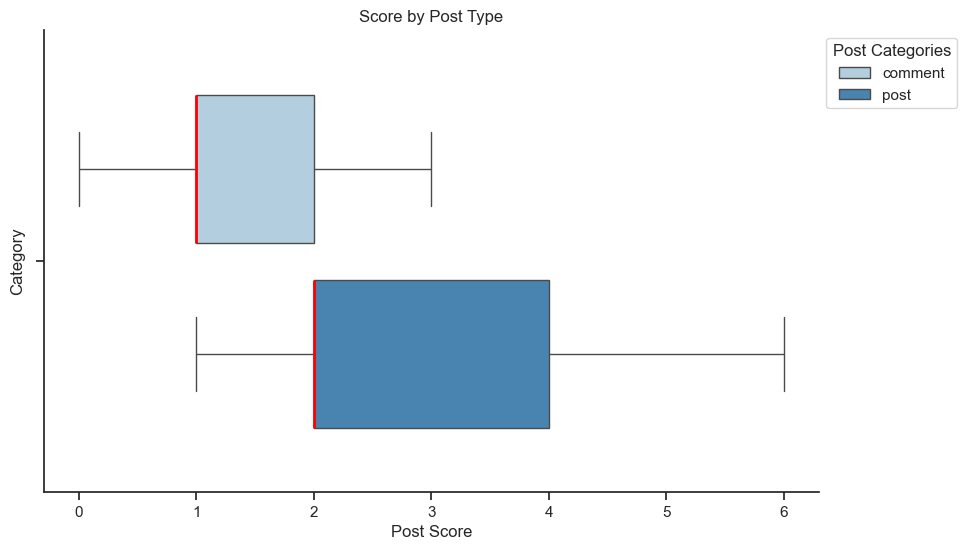

In [90]:
plt.figure(figsize=figsize_rect)
ax = sns.boxplot(
    df_score_cleaned,
    x='score',
    orient='h',
    showfliers=False, # ignore outliers (we already removed them)
    hue='type',
    gap=box_gap,
    medianprops={"color": "red", "linewidth": 2},# explictly show median
    palette="Blues"
)

sns.move_legend(
    ax,
    "upper left",
    bbox_to_anchor=(1, 1), title='Post Categories')

ax.set(
    title="Score by Post Type",
    xlabel="Post Score",
    ylabel="Category")

sns.despine()
plt.savefig('../img/score_by_type.png')

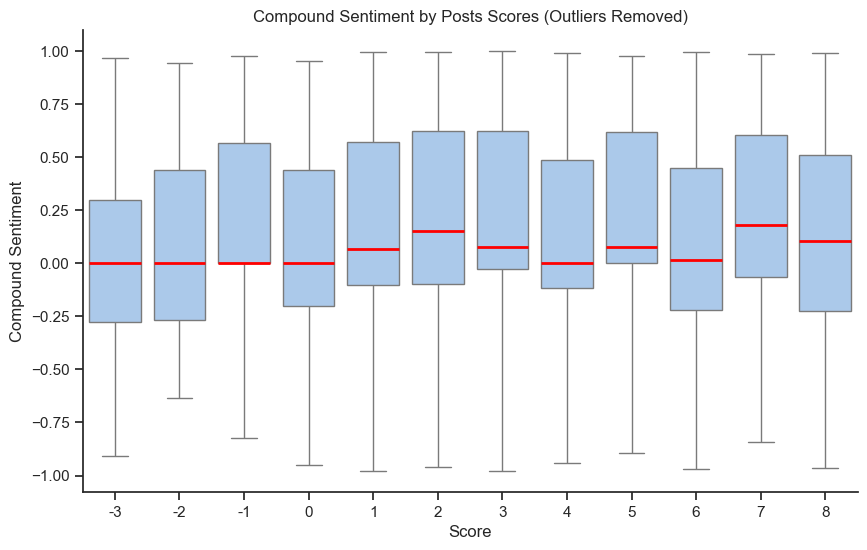

In [89]:
plt.figure(figsize=figsize_rect)
ax = sns.boxplot(
    data=df_score_cleaned,
    x='score',
    y='compound',
    medianprops={"color": "red", "linewidth": 2}, # explictly show median
)

ax.set(
    title='Compound Sentiment by Posts Scores (Outliers Removed)',
    xlabel='Score',
    ylabel='Compound Sentiment')

sns.despine() # Remove borders
plt.savefig('../img/box_compound_sent_by_score.png')

# Swearwords

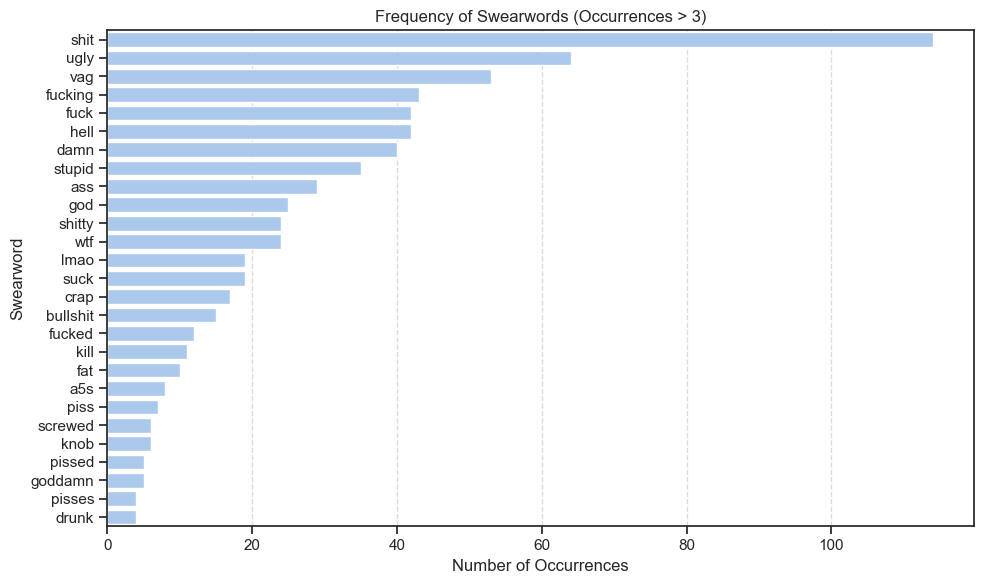

In [88]:
swearwords = df.explode('swearwords')['swearwords']
swearwords.dropna(inplace=True)
swearwords = swearwords.apply(lambda w: str.lower(w.rstrip('.,!;')))

df_by_score = swearwords.value_counts()

plt.figure(figsize=figsize_rect)

ax = sns.barplot(
    df_by_score[df_by_score > 3],
    orient='h'
)
# VAG is pretty common, google says it is another word for pussy
# VAG stands for Volkswagen and Audi Group in this context probably
ax.set(
title = 'Frequency of Swearwords (Occurrences > 3)',
xlabel= 'Number of Occurrences',
ylabel = 'Swearword'
)

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('../img/freq_swearwords.png')

In [27]:
df['swearwords_count'] = df['swearwords'].apply(lambda sw: len(sw))

df_by_sw = df.groupby('author')['swearwords_count'].sum().reset_index()
df_by_sw = df_by_sw.sort_values(by='swearwords_count', ascending=False)
df_by_sw

,author,swearwords_count
1820,[deleted],22
945,Lostinspace1110,12
652,Frankie6994,10
2673,unwise_chick3n,10
2670,unfiltered_Rabbit01,8
...,...,...
17,1wholurks1,0
18,2008AudiA3,0
19,2018GT3TOURING,0
20,2018TTRS,0


# Authors

In [34]:
df_by_posts = df.groupby(by='author').size().reset_index(name='post_count')
df_by_posts.sort_values(by='post_count',ascending=False)
## Top User(s) is [deleted] might be possible that it is a collection of multiple users

,author,post_count
1820,[deleted],162
2522,saintmarko,28
1002,Mean-Marionberry-148,23
1591,SuedeOwl,22
2406,not_old_redditor,21
...,...,...
2714,wtfhiolol10000,1
2713,wrongwayup,1
2712,wozzy93,1
2711,woojo1984,1


In [31]:
df_by_sent = df.groupby(by='author')[['pos','neg', 'neu', 'compound']].mean()
df_by_sent

,pos,neg,neu,compound
author,,,,
-5677-,0.37000,0.134000,0.496000,0.796400
-AntiSkill-,0.20600,0.298000,0.496000,-0.318200
-Gh0st96-,0.00000,0.267500,0.732500,-0.340400
-Minos-,0.57700,0.000000,0.423000,0.624900
-Non-Stop-,0.13100,0.032000,0.837000,0.317950
...,...,...,...,...
zhululu,0.05225,0.028000,0.920000,0.502025
zodiacsignsaredumb,0.38525,0.031625,0.583125,0.362650
ztunelover,0.19700,0.000000,0.803000,0.401900


In [39]:
df_by_score = df.groupby(by='author')[['score']].mean()
df_by_score

,score
author,
-5677-,3.000
-AntiSkill-,1.000
-Gh0st96-,72.000
-Minos-,2.000
-Non-Stop-,1.000
...,...
zhululu,26.500
zodiacsignsaredumb,19.125
ztunelover,6.000


In [64]:
temp = pd.merge(df_by_posts, df_by_sw, on='author', how='inner')
temp = pd.merge(temp, df_by_score, on='author', how='inner')
df_authors = pd.merge(temp, df_by_sent, on='author', how='inner')
df_authors.head()

,author,post_count,swearwords_count,score,pos,neg,neu,compound
0,-5677-,1,1,3.0,0.370,0.1340,0.4960,0.79640
1,-AntiSkill-,1,0,1.0,0.206,0.2980,0.4960,-0.31820
2,-Gh0st96-,2,1,72.0,0.000,0.2675,0.7325,-0.34040
3,-Minos-,1,0,2.0,0.577,0.0000,0.4230,0.62490
4,-Non-Stop-,2,0,1.0,0.131,0.0320,0.8370,0.31795


In [69]:
df_authors['swearwords_per_post'] = (
    (df_authors['swearwords_count'] / df_authors['post_count'])
    .replace([float('inf'), -float('inf')], 0))

# Just for better readability later on
df_authors = df_authors.rename(columns={
    'author': 'Author',
    'post_count': 'Number of Posts',
    'swearwords_count': 'Number of Swearwords',
    'score': 'Score (mean)',
    'pos': 'Positive Sentiment (mean)',
    'neg': 'Negative Sentiment (mean)',
    'neu': 'Neutral Sentiment (mean)',
    'compound': 'Compound Sentiment (mean)',
    'swearwords_per_post': 'Swearwords per Post'
})

df_authors.head()

,Author,Number of Posts,Number of Swearwords,Score (mean),Positive Sentiment (mean),Negative Sentiment (mean),Neutral Sentiment (mean),Compound Sentiment (mean),Swearwords per Post
0,-5677-,1,1,3.0,0.370,0.1340,0.4960,0.79640,1.0
1,-AntiSkill-,1,0,1.0,0.206,0.2980,0.4960,-0.31820,0.0
2,-Gh0st96-,2,1,72.0,0.000,0.2675,0.7325,-0.34040,0.5
3,-Minos-,1,0,2.0,0.577,0.0000,0.4230,0.62490,0.0
4,-Non-Stop-,2,0,1.0,0.131,0.0320,0.8370,0.31795,0.0


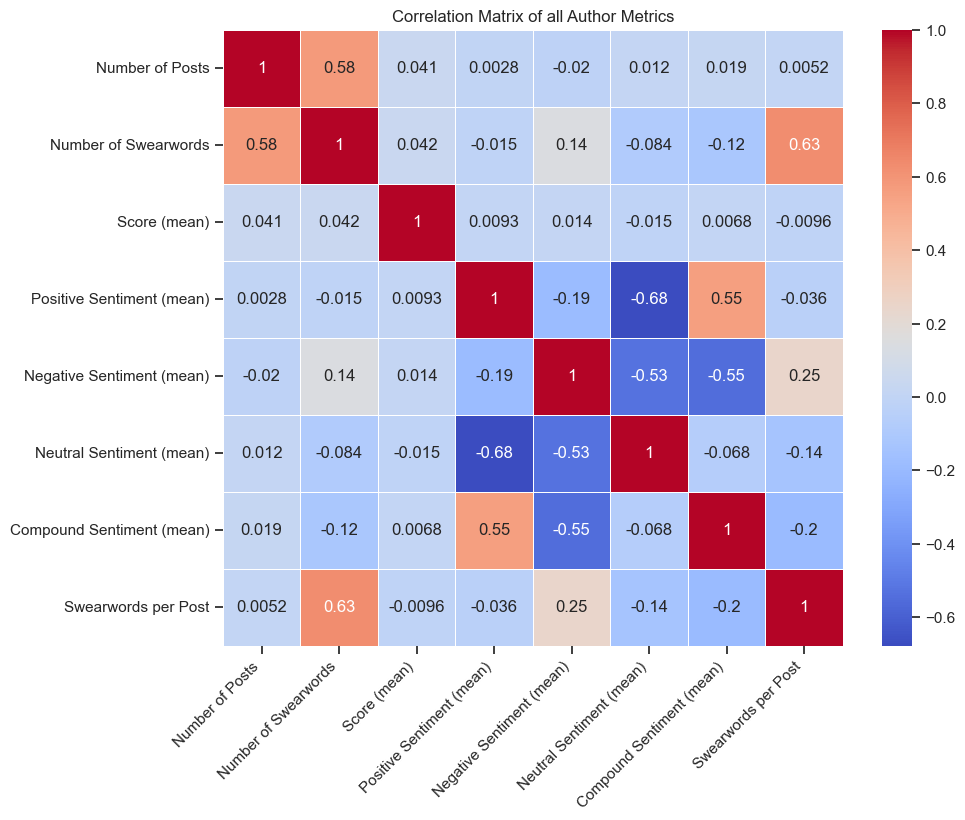

In [87]:
corr = df_authors.select_dtypes('number').corr()
# .corr() calculates the correlation for each feature with each other feature and stores it in a num_features x num_features matrix

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True,  linewidths=0.5, cmap=sns.color_palette("coolwarm", as_cmap=True))
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Matrix of all Author Metrics')
plt.savefig('../img/correlation_author.png')